<a href="https://colab.research.google.com/github/bathicodes/Feature-Engineering/blob/main/Notebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

df = pd.read_csv('Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [49]:
X = df.copy()
y = X.pop('price')

# Convert y to numeric, handling non-numeric values
y = pd.to_numeric(y, errors='coerce')
# errors='coerce' will replace non-numeric values with NaN

# Remove rows with NaN values in the target variable
X = X[y.notna()]
y = y[y.notna()]

# label encoding for categoricals
for colname in X.select_dtypes('object'):
  X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int
X.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,0,0,0,0,0,0,0,0,88.6,...,0,130,0,0,0,9.0,0,0,21,27
1,3,0,0,0,0,0,0,0,0,88.6,...,0,130,0,0,0,9.0,0,0,21,27
2,1,0,0,0,0,0,1,0,0,94.5,...,1,152,0,1,1,9.0,1,0,19,26
3,2,1,1,0,0,1,2,1,0,99.8,...,0,109,0,2,2,10.0,2,1,24,30
4,2,1,1,0,0,1,2,2,0,99.4,...,2,136,0,2,2,8.0,3,1,18,22


In [50]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):

  mi_scores = mutual_info_regression(X, y, discrete_features = discrete_features)
  mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
  mi_scores = mi_scores.sort_values(ascending=False)
  return mi_scores

mi_scores = make_mi_scores(X,y,discrete_features)
mi_scores[::3]

,MI Scores
curb-weight,1.411929
highway-mpg,0.948620
bore,0.689292
length,0.578524
fuel-system,0.477695
num-of-cylinders,0.331955
compression-ratio,0.189138
body-style,0.070563
num-of-doors,0.007341


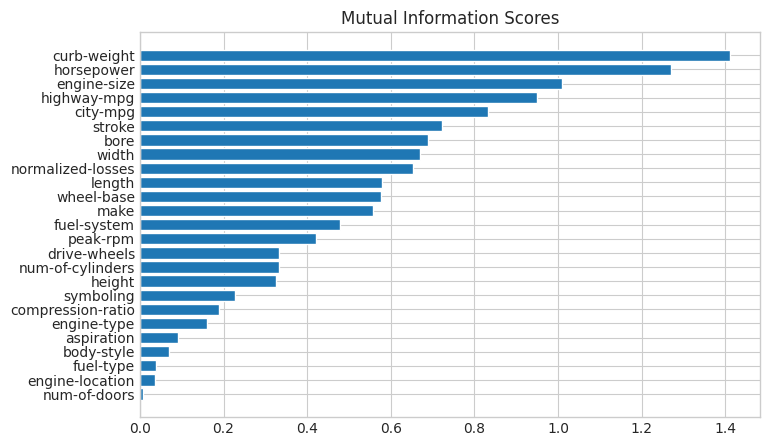

In [51]:
def plot_mi_scores(scores):
  scores = scores.sort_values(ascending = True)
  width = np.arange(len(scores))
  ticks = list(scores.index)
  plt.barh(width, scores)
  plt.yticks(width, ticks)
  plt.title('Mutual Information Scores')

plt.figure(dpi=100, figsize=(8,5))
plot_mi_scores(mi_scores)

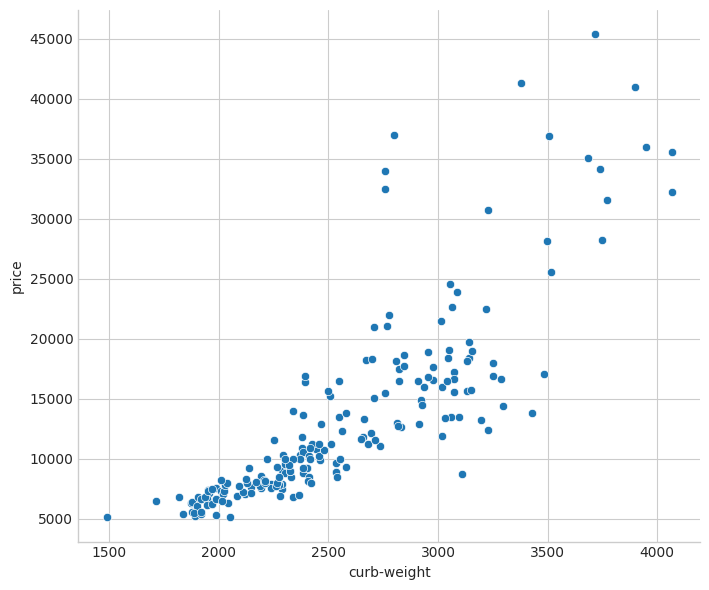

In [52]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')  # invalid parsing will turn into NaN
df.dropna(subset=['price', 'curb-weight'], inplace=True)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")  # optional
sns.relplot(x='curb-weight', y='price', data=df, height=6, aspect=1.2)
plt.show()

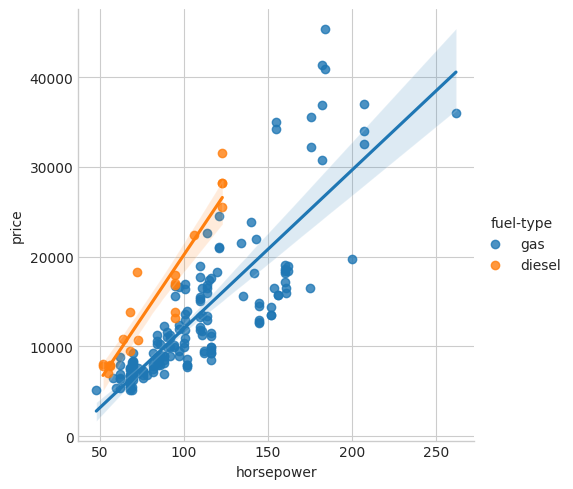

In [55]:
# 1. Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# 2. Convert horsepower and price to numeric
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# 3. Drop rows where horsepower or price is NaN
df.dropna(subset=['horsepower', 'price'], inplace=True)

# 4. Now plot
sns.set_style("whitegrid")
sns.lmplot(x='horsepower', y='price', hue='fuel-type', data=df)
plt.show()